In [4]:
import pandas as pd
import numpy as np 
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.nonparametric.smoothers_lowess import lowess
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [6]:
data_dict = {"Sales": [ 2.1, 3.6, 6.2, 10.4, 22.8, 35.6, 57.1, 83.5, 109.4, 
                         128.6, 196.8, 280.0, 462.3],
       "Manufacturing_Reps": [2, 1, 2, 3, 4, 4, 5, 5, 6, 7,8, 10,11]}

df_data = pd.DataFrame(data_dict)

In [7]:
df_data

,Sales,Manufacturing_Reps
0,2.1,2
1,3.6,1
2,6.2,2
3,10.4,3
4,22.8,4
5,35.6,4
6,57.1,5
7,83.5,5
8,109.4,6
9,128.6,7


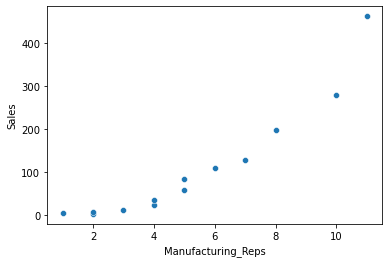

In [9]:
sns.scatterplot(data= df_data, x="Manufacturing_Reps", y="Sales")

In [10]:
df_data.corr(method = "pearson")

,Sales,Manufacturing_Reps
Sales,1.000000,0.932795
Manufacturing_Reps,0.932795,1.000000


In [11]:
df_data.corr(method = "spearman")

,Sales,Manufacturing_Reps
Sales,1.000000,0.987595
Manufacturing_Reps,0.987595,1.000000


In [12]:
df_data.shape

(13, 2)

In [13]:
model = smf.ols(formula="Sales ~ Manufacturing_Reps", data=df_data)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     73.69
Date:                Wed, 02 Mar 2022   Prob (F-statistic):           3.32e-06
Time:                        15:15:48   Log-Likelihood:                -68.499
No. Observations:                  13   AIC:                             141.0
Df Residuals:                      11   BIC:                             142.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           -107.0285     28

In [14]:
results.ssr

28721.451702557206

In [15]:
results.resid

0      27.076447
1      69.602490
2      31.176447
3      -5.649596
4     -34.275639
5     -21.475639
6     -41.001682
7     -14.601682
8     -29.727725
9     -51.553769
10    -24.379812
11    -23.231898
12    118.042059
dtype: float64

In [16]:
anova_table = sm.stats.anova_lm(results, typ=2)
print(anova_table)

                           sum_sq    df          F    PR(>F)
Manufacturing_Reps  192395.415990   1.0  73.685328  0.000003
Residual             28721.451703  11.0        NaN       NaN


Text(0, 0.5, 'Residuals')

Text(0.5, 0, 'Fitted Values')

Text(0.5, 1.0, 'Residuals vs. Fitted')

Text(105.10479184471683, -27.10479184471683, '7')

Text(104.48105955013527, 24.51894044986473, '20')

Text(111.0549784004873, 16.9450215995127, '19')

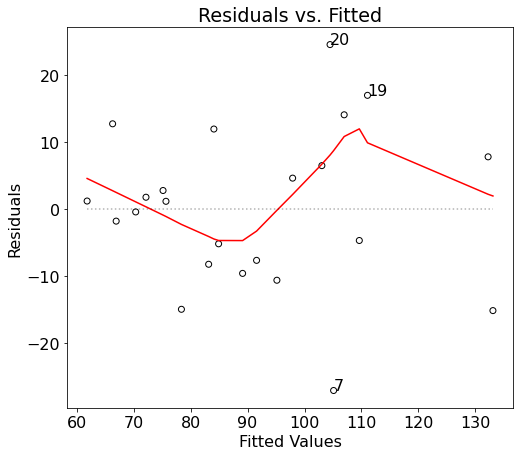

In [15]:
residuals = results.resid
fitted = results.fittedvalues
smoothed = lowess(residuals,fitted)
top3 = abs(residuals).sort_values(ascending = False)[:3]

plt.rcParams.update({'font.size': 16})
plt.rcParams["figure.figsize"] = (8,7)
fig, ax = plt.subplots()
ax.scatter(fitted, residuals, edgecolors = 'k', facecolors = 'none')
ax.plot(smoothed[:,0],smoothed[:,1],color = 'r')
ax.set_ylabel('Residuals')
ax.set_xlabel('Fitted Values')
ax.set_title('Residuals vs. Fitted')
ax.plot([min(fitted),max(fitted)],[0,0],color = 'k',linestyle = ':', alpha = .3)

for i in top3.index:
    ax.annotate(i,xy=(fitted[i],residuals[i]))

plt.show()

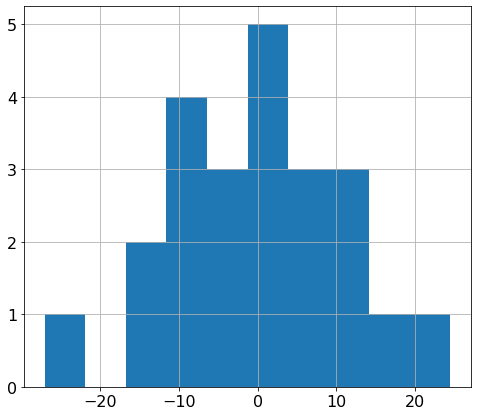

In [16]:
residuals.hist()

Text(0.5, 1.0, 'Normal Q-Q')

Text(0, 0.5, 'Standardized Residuals')

Text(0.5, 0, 'Theoretical Quantiles')

Text(-1.885410077534695, -2.252240751339366, '7')

Text(1.885410077534695, 2.0350875509459576, '20')

Text(-1.4609876467545182, -1.5218035867910058, '21')

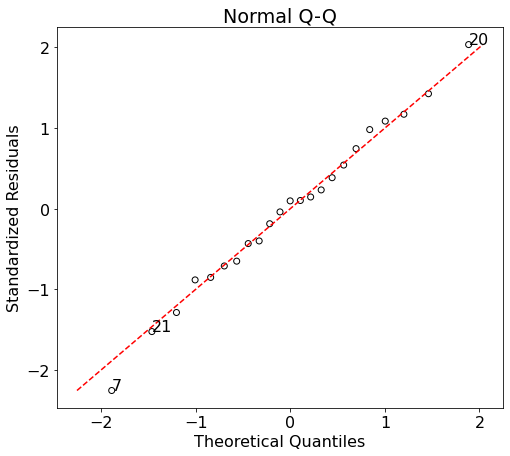

In [17]:
sorted_student_residuals = pd.Series(results.get_influence().resid_studentized_internal)
sorted_student_residuals.index = results.resid.index
sorted_student_residuals = sorted_student_residuals.sort_values(ascending = True)
df = pd.DataFrame(sorted_student_residuals)
df.columns = ['sorted_student_residuals']
df['theoretical_quantiles'] = stats.probplot(df['sorted_student_residuals'], dist = 'norm', fit = False)[0]
rankings = abs(df['sorted_student_residuals']).sort_values(ascending = False)
top3 = rankings[:3]

fig, ax = plt.subplots()
x = df['theoretical_quantiles']
y = df['sorted_student_residuals']
ax.scatter(x,y, edgecolor = 'k',facecolor = 'none')
ax.set_title('Normal Q-Q')
ax.set_ylabel('Standardized Residuals')
ax.set_xlabel('Theoretical Quantiles')
ax.plot([np.min([x,y]),np.max([x,y])],[np.min([x,y]),np.max([x,y])], color = 'r', ls = '--')
for val in top3.index:
    ax.annotate(val,xy=(df['theoretical_quantiles'].loc[val],df['sorted_student_residuals'].loc[val]))
plt.show()

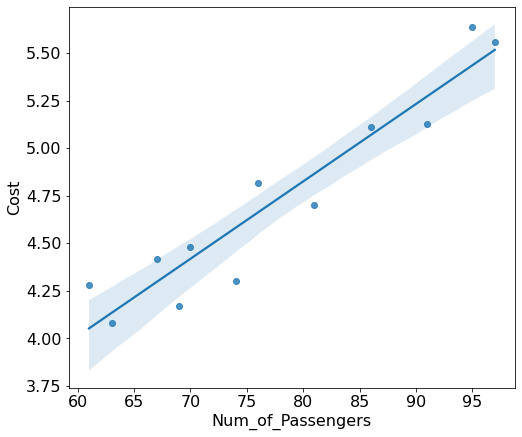

In [68]:
sns.regplot(x="Num_of_Passengers", y="Cost", data=df_airlines)

In [18]:
print(results.fittedvalues)

0      61.827294
1      66.927366
2      70.356522
3      75.670686
4      72.162154
5      75.158238
6      83.165245
7     105.104792
8      66.304780
9      78.385891
10     89.127797
11     91.580670
12     84.912718
13     95.148583
14     84.084814
15    103.045453
16     97.910805
17    106.959884
18    109.618150
19    111.054978
20    104.481060
21    133.079933
22    132.232186
dtype: float64


In [18]:
df_data['Manufacturing_Reps_sqr'] = df_data['Manufacturing_Reps'].apply(lambda x: np.square(x))
df_data

,Sales,Manufacturing_Reps,Manufacturing_Reps_sqr
0,2.1,2,4
1,3.6,1,1
2,6.2,2,4
3,10.4,3,9
4,22.8,4,16
5,35.6,4,16
6,57.1,5,25
7,83.5,5,25
8,109.4,6,36
9,128.6,7,49


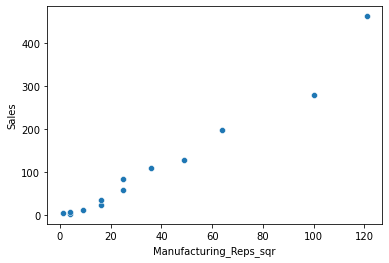

In [19]:
sns.scatterplot(data= df_data, x="Manufacturing_Reps_sqr", y="Sales")

In [20]:
df_data.corr(method = "pearson")

,Sales,Manufacturing_Reps,Manufacturing_Reps_sqr
Sales,1.000000,0.932795,0.982462
Manufacturing_Reps,0.932795,1.000000,0.970557
Manufacturing_Reps_sqr,0.982462,0.970557,1.000000


# Earlier model with Manufacturing Reps had a R square of 0.870

In [21]:
model = smf.ols(formula="Sales ~ Manufacturing_Reps_sqr", data=df_data)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     305.4
Date:                Wed, 02 Mar 2022   Prob (F-statistic):           2.26e-09
Time:                        16:02:38   Log-Likelihood:                -59.932
No. Observations:                  13   AIC:                             123.9
Df Residuals:                      11   BIC:                             125.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                -19

In [22]:
model = smf.ols(formula="Sales ~ Manufacturing_Reps + Manufacturing_Reps_sqr", data=df_data)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     177.8
Date:                Wed, 02 Mar 2022   Prob (F-statistic):           1.53e-08
Time:                        16:08:02   Log-Likelihood:                -58.373
No. Observations:                  13   AIC:                             122.7
Df Residuals:                      10   BIC:                             124.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 18